In [ ]:
!pip install -qU langchain "langchain[openai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.4/157.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os

os.environ.setdefault("OPENAI_API_KEY", "DUMMY_KEY")

### Tool 기초

In [ ]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-5-nano")

In [ ]:
response = model.invoke("현재 한국 날씨 어때?")

In [ ]:
print(response)

content='지금 한국의 실시간 날씨를 바로 알려드리진 못해요. 제 데이터로는 현재 온도나 강수 여부를 확인할 수 없어요. 원하시면 특정 도시(예: 서울, 부산, 제주 등)를 알려주시면 그 지역의 겨울 특징과 옷차림 팁은 자세히 안내해 드릴게요.\n\n실시간으로 확인하는 방법도 간단해요\n- 스마트폰의 날씨 앱에 도시명 입력\n- 웹 검색에서 “서울 날씨”처럼 도시명으로 조회\n- 공식 정보원: 기상청(KMA) 웹사이트(예: weather.go.kr)\n\n한국의 겨울 일반 특징과 팁\n- 기온: 도시마다 차이가 있지만 겨울은 대개 영하에서 영상으로 오가며, 서울은 한파가 올 때가 있습니다. 북부나 강원도는 더 춥고 눈도 자주 올 수 있어요.\n- 바람: 차가운 바람이 체감온도를 크게 낮출 수 있습니다.\n- 도로 상태: 눈이 오면 도로 상황에 주의. 교통 상황이 변동하기 쉬워요.\n- 옷차림: 두꺼운 외투, 방풍 자켓, 모자/목도리/장갑 등으로 체감 온도를 높여 주세요.\n- 건강 주의: 실내 건조 주의, 충분한 수분 섭취와 적절한 환기가 필요합니다.\n\n원하시면 특정 도시를 말해 주세요. 일반적인 겨울 날씨 특징과 현재에 맞춘 옷차림 팁을 바로 정리해 드릴게요.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 1893, 'prompt_tokens': 13, 'total_tokens': 1906, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1536, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name':

In [ ]:
from langchain.tools import tool

@tool
def get_weather(location: str) -> str:
    """ 특정 지역의 날씨 정보를 제공하는 도구 """
    return f"{location}의 날씨는 맑고, 영하 2도입니다."

In [ ]:
from langchain.agents import create_agent

agent = create_agent(model, tools = [get_weather])

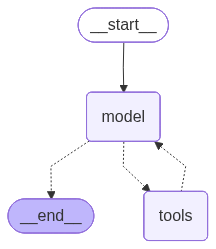

In [ ]:
agent

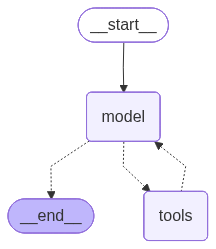

In [ ]:
from IPython.display import Image, display

# 그래프 구조 확인
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "서울 날씨 어때요?"}]},
)

In [ ]:
result

{'messages': [HumanMessage(content='서울 날씨 어때요?', additional_kwargs={}, response_metadata={}, id='034fa013-d7d3-4322-89a4-f93a19b18f98'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 215, 'prompt_tokens': 136, 'total_tokens': 351, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2Y5CXTFx3cUIVAwSq1S69l8NVBXk', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bfe6b-e1b7-7bb2-9b10-f52da7f367fa-0', tool_calls=[{'name': 'get_weather', 'args': {'location': '서울'}, 'id': 'call_FlvwqcXYDVje1LU6se8VVHly', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 136, 'output_tokens': 215, 'total_to

In [ ]:
result["messages"][-1].content

'서울은 현재 맑고 기온은 영하 2도예요. 밖에 나가실 댄 두꺼운 옷과 모자, 장갑으로 보온을 챙기세요. 더 자세한 예보나 오늘의 시간별 기온이 궁금하시면 말씀해 주세요.'

Agent 작동 **순서**
1. HumanMessage("서울 날씨 어때요?")
2. Model(추론) : "이건 get_weather를 호출해야겠다."
3. AIMessage(content='', tool_calls = [{"name": "get_weather", "args":{location": "서울"}}])
4. get_weather() 실행
5. ToolMessage("서울의 날씨는 맑고 영하 2도입니다.")
6. AIMessage(최종 응답 생성) : '현재 서울은 맑고 기온은 영하 2도예요. 아주 추우니 두꺼운 외투와 모자, 목도리로 보온 챙기세요. 필요하시면 체감 온도나 앞으로 며칠간의 예보도 알려드릴게요.'

## Tool 응용 1

In [ ]:
from langchain.tools import tool

@tool
def add(a: int, b: int) -> int:
    """`a`와 `b` 덧셈.

    Args:
        a: First int
        b: Second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """`a`와 `b` 곱셈.

    Args:
        a: First int
        b: Second int
    """
    return a * b

@tool
def divide(a: int, b: int) -> float:
    """`a`와 `b` 나눗셈.

    Args:
        a: First int
        b: Second int
    """
    return a / b

In [ ]:
tools = [add, multiply, divide]

In [ ]:
agent = create_agent(model, tools=tools)

In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "42 + 3 * 23은 뭔가요?"}]},
)

In [ ]:
result

{'messages': [HumanMessage(content='42 + 3 * 23은 뭔가요?', additional_kwargs={}, response_metadata={}, id='6e80ec4b-280f-4d7a-b452-a4e5702a0d08'),
  AIMessage(content='주어진 식의 연산 순서는 곱셈이 먼저입니다.  \n3 × 23 = 69, 그다음 42를 더하면 42 + 69 = 111입니다.\n\n정답: 111', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 633, 'prompt_tokens': 244, 'total_tokens': 877, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2rxZJD9LyJ41S6Ysz8jIMKOdWLhY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c02f9-bf09-7910-9793-ee111f18d2a1-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 244, 'output_tokens': 633, 'total_tokens': 877, 'input_token_deta

In [ ]:
agent = create_agent(
    model,
    tools,
    system_prompt="당신은 유능한 수학 선생님입니다. 사칙 연산 요청 시 모든 단계에서 Tool의 도움을 이용하세요."
)

In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "42 + 3 * 23은 뭔가요?"}]},
)

In [ ]:
result

{'messages': [HumanMessage(content='42 + 3 * 23은 뭔가요?', additional_kwargs={}, response_metadata={}, id='102163f8-699b-4206-885f-825e8c21f92b'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 538, 'prompt_tokens': 276, 'total_tokens': 814, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 512, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2rxhvaaGovrqI0kSOTsFmfeEfMZI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c02f9-e298-71d3-8b5d-f95779467686-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 23}, 'id': 'call_1aHwF3jdSLeuuo9QNcBBRwHY', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 276, 'output_tokens': 538, 'total

In [ ]:
{'messages': [
    HumanMessage(content='42 + 3 * 23은 뭔가요?', additional_kwargs={}, response_metadata={}, id='d668f973-433b-43a6-832c-12f69d7a1d47'),
    AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 666, 'prompt_tokens': 271, 'total_tokens': 937, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 640, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYN0BtgC1vSXVOqkym1wLgdCHV0mg', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--e3ff5826-b8ae-45ef-b321-845634280cac-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 23}, 'id': 'call_6JIP9XWGEL4Y8gsDf7kLMCns', 'type': 'tool_call'}], usage_metadata={'input_tokens': 271, 'output_tokens': 666, 'total_tokens': 937, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 640}}),
    ToolMessage(content='69', name='multiply', id='ce3260fd-d978-4f22-9ac8-7ecba8497b5c', tool_call_id='call_6JIP9XWGEL4Y8gsDf7kLMCns'),
    AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 302, 'total_tokens': 322, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYN0IzrIXR33PjGJkChQkJNBWEPNp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--79f83b57-4a2b-4ceb-8dd1-79bb8ac2907c-0', tool_calls=[{'name': 'add', 'args': {'a': 42, 'b': 69}, 'id': 'call_dYzyonAijap4wIkosXukpffe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 302, 'output_tokens': 20, 'total_tokens': 322, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
    ToolMessage(content='111', name='add', id='a30c98b9-41e5-4496-aed3-044c02028346', tool_call_id='call_dYzyonAijap4wIkosXukpffe'),
    AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 666, 'prompt_tokens': 333, 'total_tokens': 999, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 640, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYN0KeTPVjeebFxGf8IXHbmsLUKQ9', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--3e09231b-dfd0-4190-9c22-024988cc4389-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 23}, 'id': 'call_7i9W8KYCfoyL0V5YM3hA9CNM', 'type': 'tool_call'}], usage_metadata={'input_tokens': 333, 'output_tokens': 666, 'total_tokens': 999, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 640}}),
    ToolMessage(content='69', name='multiply', id='f041ffd3-626e-4541-9ea7-db7c200a49ef', tool_call_id='call_7i9W8KYCfoyL0V5YM3hA9CNM'),
    AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 922, 'prompt_tokens': 364, 'total_tokens': 1286, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 896, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYN0QZAwvbco2nLwS2UlXoKoQJ2zB', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--eb606c0c-8c16-4789-928d-2ed8e902074f-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 23}, 'id': 'call_bUU09sNKZb2CMKxPwn3dc7pW', 'type': 'tool_call'}], usage_metadata={'input_tokens': 364, 'output_tokens': 922, 'total_tokens': 1286, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 896}}),
    ToolMessage(content='69', name='multiply', id='9ae49215-1418-4f1b-88e3-c32caa9dd511', tool_call_id='call_bUU09sNKZb2CMKxPwn3dc7pW'),
    AIMessage(content='정답은 111입니다.\n\n설명:\n- 먼저 곱셈의 순서를 따릅니다: 3 * 23 = 69\n- 그리고 남은 더하기를 수행합니다: 42 + 69 = 111\n\n추가로, 계산 과정을 한 번에 확인하는 방법도 보여드리면:\n- 42 + 3 * 23 = 42 + (3 * 23) = 42 + 69 = 111\n\n필요한 다른 연산이 있으면 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 395, 'total_tokens': 510, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYN0Ywh5LSATE3IezdrYTcoik9Abu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--79aa9996-99f3-4463-9986-b33c4f53d706-0', usage_metadata={'input_tokens': 395, 'output_tokens': 115, 'total_tokens': 510, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})
    ]
}

In [ ]:
result["messages"][-1].content

'답: 111\n\n과정:\n- 먼저 곱셈: 3 × 23 = 69\n- 그다음 덧셈: 42 + 69 = 111\n\n따라서 42 + 3 × 23 = 111입니다.'

Agent 실행 **결과**
1. 사용자 질문
2. [AI] 곱셈 필요 판단 -> multiply(3, 23)
3. [Tool] multiply 결과 : 69
4. [AI] : 덧셈 필요 판단 -> add(42, 69)
5. [Tool] : add 결과 : 111
6. [AI] (내부 reasoning 반복 시도)
7. [AI] 최종 답변 출력 : "정답은 111입니다."

## Tool 응용 2 - 알라딘 API

In [ ]:
response = model.invoke("현재 알라딘에서 베스트셀러 Top10 뭐야?")

In [ ]:
print(result["messages"][-1].content)

In [ ]:
from langchain.tools import tool
from typing import List, Dict, Any

import requests

@tool
def fetch_aladin_bestseller_top10() -> List[Dict[str, Any]]:
    """
    알라딘 베스트셀러 목록을 조회하고 Top N개(기본 10)를 반환합니다.
    """
    url = "http://www.aladin.co.kr/ttb/api/ItemList.aspx"
    params = {
        # "ttbkey": "ttbjaypakdevkrxxxxxxxxxx",
        "QueryType": "Bestseller",
        "MaxResults": 10,
        "start": 1,
        "SearchTarget": "Book",
        "output": "js",
        "Version": "20131101"
    }
    resp = requests.get(url, params=params)
    resp.raise_for_status()
    data = resp.json()
    items = data.get("item", [])
    top10 = items[:10]
    return top10

In [ ]:
agent = create_agent(model, tools = [fetch_aladin_bestseller_top10])

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "현재 알라딘에서 베스트셀러 Top10 뭐야?"}]},
)

In [ ]:
response

{'messages': [HumanMessage(content='현재 알라딘에서 베스트셀러 Top10 뭐야?', additional_kwargs={}, response_metadata={}, id='1e6ea7d5-2b3e-45e9-83b3-63b398825b49'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 217, 'prompt_tokens': 157, 'total_tokens': 374, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2s8g1SpdtW30YU504MciRVh2dA9c', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0304-4947-7382-b18f-7a35fe71d3b1-0', tool_calls=[{'name': 'fetch_aladin_bestseller_top10', 'args': {}, 'id': 'call_3VuK3p5DsJoFJLARX07jMeKz', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 157, 'output_tokens'

In [ ]:
response["messages"][-1].content

'다음은 알라딘 베스트셀러 Top 10 현황입니다.\n\n1. 괴테는 모든 것을 말했다 - 제172회 아쿠타가와상 수상작 — 스즈키 유이(지은이), 이지수(옮긴이)\n2. 돈의 방정식 - 돈을 지위와 성공의 기준, 그 이상으로 다루기 위한 21가지 이야기 — 모건 하우절(지은이), 박영준(옮긴이)\n3. 박곰희 연금 부자 수업 - 4개의 통장으로 월 300만 원 만들기 — 박곰희\n4. 너와 장밋빛 매일 2 (트리플 특전판) — 히로 치히로(지은이), 이소연(옮긴이)\n5. 불가항력의 I LOVE YOU 7 — 호시노 미즈키(지은이), 김서은(옮긴이)\n6. 요리를 한다는 것 — 최강록\n7. 자본주의 시대에서 살아남기 위한 최소한의 경제 공부 — 백억남(김욱현)\n8. 진보를 위한 주식투자 - 광수네 복덕방, 모두의 투자 이야기 — 이광수\n9. 안녕이라 그랬어 — 김애란\n10. 혼모노 — 성해나\n\n원하시면 각 도서의 가격이나 구매 링크도 함께 정리해드릴게요.'

## Memory

- 다중 턴 대화 시 대화 맥락을 고려한 Tool 호출을 위해 메모리 관리 필요

- 메모리 종류
    - Short-term memory : Checkpointer를 통해 대화 스레드(세션) 저장
    - Long-term memory : Store를 통해 장기 메모리 저장

In [ ]:
tools=[]

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

agent = create_agent(
    model,
    tools,
    checkpointer = InMemorySaver()
)

In [ ]:
response = agent.invoke(
    {"messages" : [{"role" : "user", "content" : "안녕하세요 저는 jwg입니다."}]},
    {"configurable" : {"thread_id" : "thread_1"}}
)

In [ ]:
response

{'messages': [HumanMessage(content='안녕하세요 저는 jwg입니다.', additional_kwargs={}, response_metadata={}, id='ea54c896-af13-462b-89f2-ffd7cc7c6774'),
  AIMessage(content='안녕하세요, jwg님! 만나서 반갑습니다. 무엇을 도와드릴까요?\n\n가능한 도움들 예:\n- 대화 연습이나 한국어 표현 다듬기\n- 글쓰기/문서 교정 및 피드백\n- 번역이나 다국어 정리\n- 코딩 문제 풀이 및 코드 리뷰\n- 정보 정리나 학습 계획 수립\n\n혹시 어떤 분야나 목표가 있으신가요? 시작하고 싶은 주제나 원하는 방식이 있다면 알려주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 440, 'prompt_tokens': 13, 'total_tokens': 453, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2sJnuyIdGIiWOBiGJEEnnLZieEtG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c030e-cc27-7483-9a1c-75d52788814a-0', tool_calls=[], inva

In [ ]:
print(response["messages"][-1].content)

안녕하세요, jwg님! 만나서 반갑습니다. 무엇을 도와드릴까요?

가능한 도움들 예:
- 대화 연습이나 한국어 표현 다듬기
- 글쓰기/문서 교정 및 피드백
- 번역이나 다국어 정리
- 코딩 문제 풀이 및 코드 리뷰
- 정보 정리나 학습 계획 수립

혹시 어떤 분야나 목표가 있으신가요? 시작하고 싶은 주제나 원하는 방식이 있다면 알려주세요.


In [ ]:
response = agent.invoke(
    {"messages" : [{"role" : "user", "content" : "제 이름이 뭐라고 했죠?"}]},
    {"configurable" : {"thread_id" : "thread_1"}}
 )

In [ ]:
print(response["messages"][-1].content)

맞습니다. 당신의 이름은 jwg입니다. 바꿔 부르고 싶은 다른 이름이 있나요?


In [ ]:
#id가 바뀐 경우 thread_1 -> thread_2
response = agent.invoke(
    {"messages" : [{"role" : "user", "content" : "제 이름이 뭐라고 했죠?"}]},
    {"configurable" : {"thread_id" : "thread_2"}}
)

In [ ]:
print(response["messages"][-1].content)

지금 이 대화에서 당신의 이름을 기억하고 있지 않아요. 이름을 알려주시면 이 대화에서 그 이름으로 불러드릴게요. 원하시는 이름이나 별칭이 있나요?


In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "지금까지 무슨 얘기 나눴죠?"}]},
    {"configurable": {"thread_id": "thread_1"}},
)

In [ ]:
for i, msg in enumerate(response["messages"]):
    print(f"--- Message {i+1} ---")
    print(msg.content)
    print()

--- Message 1 ---
안녕하세요 저는 jwg입니다.

--- Message 2 ---
안녕하세요, jwg님! 만나서 반갑습니다. 무엇을 도와드릴까요?

가능한 도움들 예:
- 대화 연습이나 한국어 표현 다듬기
- 글쓰기/문서 교정 및 피드백
- 번역이나 다국어 정리
- 코딩 문제 풀이 및 코드 리뷰
- 정보 정리나 학습 계획 수립

혹시 어떤 분야나 목표가 있으신가요? 시작하고 싶은 주제나 원하는 방식이 있다면 알려주세요.

--- Message 3 ---
제 이름이 뭐라고 했죠?

--- Message 4 ---
제 이름은 jwg입니다. 다르게 부르고 싶으신 이름이 있나요?

--- Message 5 ---
제 이름이 뭐라고 했죠?

--- Message 6 ---
당신의 이름은 jwg입니다. 바꿔 부르고 싶은 다른 이름이 있나요?

--- Message 7 ---
제 이름이 뭐라고 했죠?

--- Message 8 ---
맞습니다. 당신의 이름은 jwg입니다. 바꿔 부르고 싶은 다른 이름이 있나요?

--- Message 9 ---
지금까지 무슨 얘기 나눴죠?

--- Message 10 ---
지금까지의 대화를 간단히 정리하면 이렇습니다:

- 당신은 자신을 jwg로 소개했습니다.
- 제가 당신의 이름이 jwg임을 확인했고, 원하시면 다른 이름으로도 부를 수 있다고 물었습니다.
- 여러 차례 같은 질문에 대해 같은 답변(당신의 이름은 jwg입니다)을 드렸고, 필요한 경우 다른 이름으로 부르고 싶은지 물었습니다.
- 또한 가능하면 도와드릴 수 있는 분야로 대화 주제 예시를 제시했습니다 (대화 연습, 글쓰기/교정, 번역, 코딩 문제 풀이, 정보 정리 등).

다시 한 번 요약이 필요하시면 더 간단하게 드릴 수 있고, 특정 부분을 다시 확인하거나 앞으로 하고 싶은 주제가 있다면 알려주세요. 어떤 방향으로 도와드릴까요?



In [ ]:
response

{'messages': [HumanMessage(content='안녕하세요 저는 jwg입니다.', additional_kwargs={}, response_metadata={}, id='ea54c896-af13-462b-89f2-ffd7cc7c6774'),
  AIMessage(content='안녕하세요, jwg님! 만나서 반갑습니다. 무엇을 도와드릴까요?\n\n가능한 도움들 예:\n- 대화 연습이나 한국어 표현 다듬기\n- 글쓰기/문서 교정 및 피드백\n- 번역이나 다국어 정리\n- 코딩 문제 풀이 및 코드 리뷰\n- 정보 정리나 학습 계획 수립\n\n혹시 어떤 분야나 목표가 있으신가요? 시작하고 싶은 주제나 원하는 방식이 있다면 알려주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 440, 'prompt_tokens': 13, 'total_tokens': 453, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2sJnuyIdGIiWOBiGJEEnnLZieEtG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c030e-cc27-7483-9a1c-75d52788814a-0', tool_calls=[], inva

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "지금까지 무슨 얘기 나눴죠?"}]},
    {"configurable": {"thread_id": "2"}},
)

In [ ]:
for i, msg in enumerate(response["messages"]):
    print(f"--- Message {i+1} ---")
    print(msg.content)
    print()

--- Message 1 ---
지금까지 무슨 얘기 나눴죠?

--- Message 2 ---
지금까지의 대화를 제가 직접 확인할 수 없어 요약을 바로 드리기 어렵어요. 원하시면 아래 방법 중 하나로 요약해 드릴게요.

- 대화 내용 전체를 여기에 붙여넣기: 최근 대화문을 복사해 보내주시면 핵심 포인트로 정리해 드립니다.
- 주제나 키워드만 알려주기: 다룬 주제들(예: 계획 수립, 자료 요약, 문제 해결 등)을 알려주시면 그에 맞춘 간단한 요약과 핵심 포인트를 드립니다.
- 특정 부분만 요약 원하기: 특정 메시지나 주제에 한해 요약을 원하신다면 그 부분을 지정해 주세요.

원하는 방식으로 알려주시면 바로 요약해 드리겠습니다.



## Middleware

- Middleware : Agent 내부에서 일어나는 일을 섬세하게 컨트롤 하는 방법

- 기능
    - Agent 내부 활동 모니터링 및 컨트롤
    - 프롬프트, tool 선택, 출력 포맷 수정
    - 가드레일 (개인정보 인식, 프롬프트 인젝션 방지)

- 종류
    - Built-in middleware
    - Custom middlware

### Built-in middleware

- 랭체인 빌트 인 미들웨어 종류
    - Summarization (대화 요약)
    - Human-in-the-loop (사용자 개입)
    - Model call limit (모델 호출 제한)
    - Tool call limit (도구 호출 제한)
    - Model fallback (대체 모델)
    - PII detection (개인정보 탐지)
    - Todo list (할 일 목록)
    - LLM toll selector (LLM 기반 도구 선택)
    - Tool retry (도구 재시도)
    - LLM tool emulator (LLM 기반 tool 흉내내기)
    - Context editing (컨텍스트 편집)

#### LLM tool emulator

In [ ]:
from langchain.tools import tool
from typing import List, Dict


# 이메일 전송 도구
@tool
def send_email_tool(to: str, subject: str, body: str) -> str:
    """
    지정한 이메일 주소로 메일을 보내는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 전송되었습니다.\n수신자: {to}\n제목: {subject}\n내용: {body[:50]}..."


# 이메일 읽기 도구
@tool
def read_email_tool(limit: int = 3) -> List[Dict[str, str]]:
    """
    최근 받은 이메일 3개를 읽는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 조회되었습니다."

In [ ]:
from langchain.agents.middleware import LLMToolEmulator

agent = create_agent(
    model="gpt-5-nano",
    tools=[send_email_tool, read_email_tool],
    middleware=[
        LLMToolEmulator(model="gpt-5-nano")
    ]
)

In [ ]:
response = agent.invoke(
    {
        "messages": [
            {"role": "user", "content": "최근 온 메일 확인하고 알아서 답장해줘."}
        ]
    }
)

In [ ]:
print(response["messages"][-1].content)

다음과 같이 처리했습니다.

요약
- 최근 온 메일 3통 확인하고, 첫 번째 메일에 대해 자동으로 답장을 보내셨습니다.
- 보낸 메일 정보
  - 받는 사람: minsulee@example.com
  - 제목: RE: 이번 주 회의록 공유
  - 발송 시각: 2026-01-28 14:32:45 (UTC)
  - 메시지 ID: MSG-20260128-042015
  - 본문 요약: 금요일 회의 의제와 초안 업데이트를 확인했고, 첨부 파일의 개선 제안 및 참석자 확인에 관한 제안을 아래와 같이 반영하겠다고 안내. 구체 내용으로는 주요 수정 포인트 공유, 개선 사항 반영 여부 결정, 참석자 확인 여부 반영 여부를 알려달라는 요청. 필요 시 추가로 전달할 점도 회신 부탁드린다는 내용.

남은 메일 요약
- TechDaily Newsletter <newsletter@techdaily.co>
  - 제목: 이달의 핫 토픽 요약
  - 날짜: 2026-01-27 17:15
  - 미리보기: AI 최신 동향과 실무 적용 사례 요약
- CJ Logistics <no-reply@cjlogistics.co.kr>
  - 제목: 주문 #A12345 배송 시작
  - 날짜: 2026-01-27 11:03
  - 미리보기: 배송 시작 안내 및 트래킹 번호 안내

다음 제안(선택사항)
- 남은 두 메일에 대해 간단한 응답 초안을 작성해 자동 발송해 드릴까요?
  - TechDaily Newsletter: 구독 관련 확인 요청이나 수신 유지 여부 확인 등의 간단한 인사말
  - CJ Logistics: 배송 시작 알림에 대한 확인 메일(트래킹 번호 재확인 요청 등) 또는 배송 상태 확인 요청
- 원하시는 톤이 있나요? 예: 정중하고 간단한 비즈니스 톤, 더 친근한 톤 등
- 추가로 자동으로 메일을 읽고 태깅(예: 작업 필요/참고/완료)하거나 회의록 공유 등으로 분류해 드릴까요?

원하시면 지금 바로 남은 두 메일에 대한 자동 응답 초안을 작성해 보내드리겠습니다. 어떤 방식으로 진행할지 알

In [ ]:
response

{'messages': [HumanMessage(content='최근 온 메일 확인하고 알아서 답장해줘.', additional_kwargs={}, response_metadata={}, id='76c3a5f6-ac2c-4849-ab27-bb9ddd0c1438'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 792, 'prompt_tokens': 189, 'total_tokens': 981, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 768, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2sjKTuVDrvh9gxGUbX6K0pUmVAwD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0326-f344-7130-b0d0-e1bdb14ccc83-0', tool_calls=[{'name': 'read_email_tool', 'args': {'limit': 3}, 'id': 'call_iLd6IZv8TQZVCox8p6YBLvJh', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 189, 'output_tokens': 792,

#### Todo list

In [ ]:
from langchain.tools import tool
from typing import List, Dict


# 이메일 전송 도구
@tool
def send_email_tool(to: str, subject: str, body: str) -> str:
    """
    지정한 이메일 주소로 메일을 보내는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 전송되었습니다.\n수신자: {to}\n제목: {subject}\n내용: {body[:50]}..."


# 이메일 읽기 도구
@tool
def read_email_tool(limit: int = 3) -> List[Dict[str, str]]:
    """
    최근 받은 이메일 3개를 읽는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 조회되었습니다."

In [ ]:
from langchain.agents.middleware import LLMToolEmulator, TodoListMiddleware


agent = create_agent(
    model="gpt-5-nano",
    tools=[send_email_tool, read_email_tool],
    middleware=[
        LLMToolEmulator(model="gpt-5-nano"),
        TodoListMiddleware()
    ],
)

In [ ]:
result = agent.invoke({
    "messages": [
            {"role": "user", "content": "온 메일 다 확인한 뒤 나한테 요약해 보고해. 그 다음 답장 작성해 회신 보내줘. 마지막으로 어떻게 보냈는지 보고하고."}
    ]
})

In [ ]:
print(result["messages"][-1].content)

다음과 같이 처리했습니다. 필요하신 추가 수정이나 더 보고 싶은 항목이 있다면 말씀해 주세요.

1) 읽은 메일 요약
- 메일 1
  - 송신자: 한지수 과장 <jisu.han@example.com>
  - 날짜: 2026-01-28 09:15
  - 제목: 회의 일정 변경 안내
  - 요지: 다음 주 화요일로 예정되었던 팀 회의 시간이 10시로 변경됨. 참석 여부 회신 필요. 장소: 3층 회의실 A
  - 필요한 조치: 참석 여부 회신

- 메일 2
  - 송신자: 인재개발팀 <careers@example.com>
  - 날짜: 2026-01-27 17:40
  - 제목: [채용] 데이터 엔지니어 면접 일정 제안
  - 요지: 면접 시간대 조율 필요. 회신은 오늘 안으로 부탁
  - 필요한 조치: 가능 시간대 제시 및 회신

- 메일 3
  - 송신자: 고객지원센터 <support@example.com>
  - 날짜: 2026-01-27 09:02
  - 제목: 주문 번호 #12345 배송 업데이트
  - 요지: 주문 출고 완료, 배송 예정일 2월 2일 내외, 트래킹 번호 곧 발송 예정. 배송 현황 확인 요청
  - 필요한 조치: 배송 현황 확인 및 필요 시 대응

2) 작성 완료된 회신 초안
- 메일 1에 대한 회신 초안
  - 제목: 회의 일정 확인 및 참석 여부 회신
  - 내용: 다음 주 회의 일정 변경에 대한 참석 여부 확인 및 필요 시 대안 제시
- 메일 2에 대한 회신 초안
  - 제목: Re: [채용] 데이터 엔지니어 면접 일정 제안
  - 내용: 가능한 시간대 제시 및 회신 기한 준수 여부 확인
- 메일 3에 대한 회신 초안
  - 제목: Re: 주문 번호 #12345 배송 업데이트
  - 내용: 배송 현황 확인 및 추가 정보 필요 시 요청

3) 보낸 메일 내역
- 보낸 사람: (연결된 이메일 발신 대화에서 전송 완료)
- 수신자: 각 메일에 대응하는 수신자
- 시각: 각 회신 발송 시점
- 상태: 발송 완료

4) 발송 보고
- 발송 상태

In [ ]:
result

{'messages': [HumanMessage(content='온 메일 다 확인한 뒤 나한테 요약해 보고해. 그 다음 답장 작성해 회신 보내줘. 마지막으로 어떻게 보냈는지 보고하고.', additional_kwargs={}, response_metadata={}, id='f2ae68d1-d111-430e-92a3-a93418a563db'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1033, 'prompt_tokens': 1285, 'total_tokens': 2318, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 896, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2ssO3dSaY9vkyV3C3kHzQdNCIFVo', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c032f-869d-7ce0-b3a0-4cd288d998e6-0', tool_calls=[{'name': 'write_todos', 'args': {'todos': [{'content': 'Read the latest 3 emails from inbox (limit 3)', 'status': 'in_progress'}, {'content': 'Sum

#### Human-in-the-loop
- 작업 전 사용자의 의사를 묻는 미들웨어
    -> 고도화된 업무에 적합

- 반드시 checkpointer와 함께 사용!!

- allow_decision 옵션
    - approve
    - edit
    - reject

In [ ]:
from langchain.tools import tool

@tool
def read_email_tool(limit: int = 3) -> List[Dict[str, str]]:
    """
    최근 받은 이메일 3개를 읽는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 조회되었습니다."


@tool
def send_email_tool(to: str, subject: str, body: str) -> str:
    """이메일을 발송하는 도구"""
    return f"{to}에게 메일을 보냈습니다.\n제목: {subject}\n내용: {body[:40]}..."

In [ ]:
from langchain.agents.middleware import LLMToolEmulator, HumanInTheLoopMiddleware
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

agent = create_agent(
    model,
    tools=[send_email_tool, read_email_tool],
    # 체크포인터 연결
    checkpointer = checkpointer,
    middleware=[
        LLMToolEmulator(model="gpt-5-nano"),
        HumanInTheLoopMiddleware(
            interrupt_on = {
                "send_email_tool" : {
                    "allowed_decisions" : ["approve", "edit", "reject"]
                },
                "read_email_tool" : False
            }
        )
    ],
)

In [ ]:
prompt = "무슨 메일 왔는지 확인해줘"

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
    {"configurable": {"thread_id": "HIL-a"}}
)

In [ ]:
print(response["messages"][-1])

content='다음 3통의 메일이 왔어요.\n\n- e1\n  - 보낸 사람: Min Seo Kim <min.seo.kim@example.com>\n  - 날짜: 2026-01-28 09:12\n  - 제목: Re: Project kickoff rescheduled\n  - 요약: 프로젝트 킥오프가 다음 주 수요일 10:00으로 변경되었음. 가능 여부 확인 필요.\n  - 필요 시 할 일: 참석 가능 여부 확인 회신\n\n- e2\n  - 보낸 사람: Lina Park <lina.park@example.org>\n  - 날짜: 2026-01-27 15:37\n  - 제목: Invoice #4482 due soon\n  - 요약: 디자인 서비스 청구서 #4482가 2월 5일 선납 마감 예정. 첨부파일: Invoice_4482.pdf\n  - 필요 시 할 일: 결제 준비 및 첨부파일 확인\n\n- e3\n  - 보낸 사람: HR Team <hr@examplecorp.com>\n  - 날짜: 2026-01-26 11:28\n  - 제목: Benefits enrollment period ends soon\n  - 요약: 오픈 enrollment 마감이 곧임. 혜택 검토 후 변경사항 제출 권장.\n  - 필요 시 할 일: 혜택 선택/변경 검토 및 제출\n\n원하시면 특정 메일의 전체 내용을 확인하거나(본문 열람), 회신/결제/변경 등을 도와드릴게요. 어떤 메일부터 먼저 확인해볼까요?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 1308, 'prompt_tokens': 461, 'total_tokens': 1769, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 960, 'rejected_prediction_toke

In [ ]:
response

{'messages': [HumanMessage(content='무슨 메일 왔는지 확인해줘', additional_kwargs={}, response_metadata={}, id='126fdd1c-83c9-4e54-925d-e2cc42569c0f'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 218, 'prompt_tokens': 181, 'total_tokens': 399, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2tHEmQ3Pu1GvmnLNL04LiFiHQZ0s', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0347-0768-7a81-b3b0-e070df06cc1e-0', tool_calls=[{'name': 'read_email_tool', 'args': {'limit': 3}, 'id': 'call_WoldQaWSQnamZBtJYl7wJ1UM', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 181, 'output_tokens': 218, 'total_

In [ ]:
prompt = "교수님한테 내일 찾아뵙겠다는 메일 작성해서 보내줘."

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
    {"configurable": {"thread_id": "HIL-b"}}
)

In [ ]:
response["messages"][-1].content

'좋습니다. 다만 교수님 이메일 주소와 정확한 내용을 알아야 메일을 실제로 보낼 수 있습니다. 아래 두 가지 중에서 원하는 버전을 골라 수정해 주시면 됩니다. 필요한 정보(교수님 이메일, 이름, 본인 정보, 내일의 시간 선호 등)도 함께 알려주시면 바로 반영해서 보내드릴게요.\n\n템플릿 1) 아주 간결하고 정중한 버전\n제목: 내일 면담 가능 여부 문의드립니다\n\n교수님 안녕하세요. 저는 [학과]의 [이름]입니다. 다름이 아니라 교수님의 조언을 듣고자 내일 짧은 면담을 부탁드리고자 메일드립니다. 가능하신 면담 시간이 있으시다면 알려주시면 그 시간에 맞춰 찾아뵙겠습니다. 감사합니다.\n\n[이름] 드림\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n템플릿 2) 조금 더 구체적이고 정중한 버전\n제목: 내일 면담 가능 여부 및 일정 문의드립니다\n\n교수님께,\n안녕하십니까. 저는 [학과]의 [이름]입니다. 현재 [연구 주제/수업 관련 주제]에 대해 교수님의 조언을 받고 싶어 이렇게 메일드립니다. 내일 교수님을 찾아뵙고 짧은 면담(약 15분)을 부탁드려도 될지요? 가능하신 시간대와 장소를 알려주시면 그 일정에 맞춰 찾아뵙겠습니다. 불편하신 점이 있으시면 알려주십시오. 감사합니다.\n\n[이름] / [학과], [학년]\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n필요 정보(빠르게 보내주시면 바로 완성본으로 보내드려요)\n- 교수님 이메일:\n- 교수님 성함:\n- 본인 이름:\n- 소속 학과/학년:\n- 내일 희망 시간대(예: 오전 10시~10시 15분, 30분 범위):\n- 면담 장소(교수님 연구실/사무실 등):\n- 면담 주제 한 줄 요약:\n- 연락처(휴대폰/이메일):\n- 원하시는 톤(간결/정중/격식 등):\n\n정보를 주시면 바로 실제 보내는 버전을 만들어 드리고, 필요하다면 제가 대신 보내드리겠습니다.'

In [ ]:
response

{'messages': [HumanMessage(content='교수님한테 내일 찾아뵙겠다는 메일 작성해서 보내줘.', additional_kwargs={}, response_metadata={}, id='8f790b6f-1e12-4420-8d84-3b026abdbe8d'),
  AIMessage(content='좋습니다. 다만 교수님 이메일 주소와 정확한 내용을 알아야 메일을 실제로 보낼 수 있습니다. 아래 두 가지 중에서 원하는 버전을 골라 수정해 주시면 됩니다. 필요한 정보(교수님 이메일, 이름, 본인 정보, 내일의 시간 선호 등)도 함께 알려주시면 바로 반영해서 보내드릴게요.\n\n템플릿 1) 아주 간결하고 정중한 버전\n제목: 내일 면담 가능 여부 문의드립니다\n\n교수님 안녕하세요. 저는 [학과]의 [이름]입니다. 다름이 아니라 교수님의 조언을 듣고자 내일 짧은 면담을 부탁드리고자 메일드립니다. 가능하신 면담 시간이 있으시다면 알려주시면 그 시간에 맞춰 찾아뵙겠습니다. 감사합니다.\n\n[이름] 드림\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n템플릿 2) 조금 더 구체적이고 정중한 버전\n제목: 내일 면담 가능 여부 및 일정 문의드립니다\n\n교수님께,\n안녕하십니까. 저는 [학과]의 [이름]입니다. 현재 [연구 주제/수업 관련 주제]에 대해 교수님의 조언을 받고 싶어 이렇게 메일드립니다. 내일 교수님을 찾아뵙고 짧은 면담(약 15분)을 부탁드려도 될지요? 가능하신 시간대와 장소를 알려주시면 그 일정에 맞춰 찾아뵙겠습니다. 불편하신 점이 있으시면 알려주십시오. 감사합니다.\n\n[이름] / [학과], [학년]\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n필요 정보(빠르게 보내주시면 바로 완성본으로 보내드려요)\n- 교수님 이메일:\n- 교수님 성함:\n- 본인 이름:\n- 소속 학과/학년:\n- 내일 희망 시간대(예: 오전 10시~10시 15분, 30분 범위):\n- 면담 장소(교수님 연구실/사무실 등):\n- 

In [ ]:
prompt = "교수님 이메일 : prof_kim@edu.com, 교수님 성함 : kim, 내 이름; jwg, 내일의 시간 선호 : 14시, 학과 : 컴퓨터공학과, 장소 : 교수님 연구실, 내 이메일 : jwg@edu.com"

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
    {"configurable": {"thread_id": "HIL-b"}}
)

In [ ]:
response

{'messages': [HumanMessage(content='교수님한테 내일 찾아뵙겠다는 메일 작성해서 보내줘.', additional_kwargs={}, response_metadata={}, id='8f790b6f-1e12-4420-8d84-3b026abdbe8d'),
  AIMessage(content='좋습니다. 다만 교수님 이메일 주소와 정확한 내용을 알아야 메일을 실제로 보낼 수 있습니다. 아래 두 가지 중에서 원하는 버전을 골라 수정해 주시면 됩니다. 필요한 정보(교수님 이메일, 이름, 본인 정보, 내일의 시간 선호 등)도 함께 알려주시면 바로 반영해서 보내드릴게요.\n\n템플릿 1) 아주 간결하고 정중한 버전\n제목: 내일 면담 가능 여부 문의드립니다\n\n교수님 안녕하세요. 저는 [학과]의 [이름]입니다. 다름이 아니라 교수님의 조언을 듣고자 내일 짧은 면담을 부탁드리고자 메일드립니다. 가능하신 면담 시간이 있으시다면 알려주시면 그 시간에 맞춰 찾아뵙겠습니다. 감사합니다.\n\n[이름] 드림\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n템플릿 2) 조금 더 구체적이고 정중한 버전\n제목: 내일 면담 가능 여부 및 일정 문의드립니다\n\n교수님께,\n안녕하십니까. 저는 [학과]의 [이름]입니다. 현재 [연구 주제/수업 관련 주제]에 대해 교수님의 조언을 받고 싶어 이렇게 메일드립니다. 내일 교수님을 찾아뵙고 짧은 면담(약 15분)을 부탁드려도 될지요? 가능하신 시간대와 장소를 알려주시면 그 일정에 맞춰 찾아뵙겠습니다. 불편하신 점이 있으시면 알려주십시오. 감사합니다.\n\n[이름] / [학과], [학년]\n연락처: [전화번호/이메일]\n(선택) 학번: [학번]\n\n필요 정보(빠르게 보내주시면 바로 완성본으로 보내드려요)\n- 교수님 이메일:\n- 교수님 성함:\n- 본인 이름:\n- 소속 학과/학년:\n- 내일 희망 시간대(예: 오전 10시~10시 15분, 30분 범위):\n- 면담 장소(교수님 연구실/사무실 등):\n- 

#### PII Detection
- PII detection (개인 정보 탐지)
    - PII : Personally Identifiable Information
        -> 의료, 헬스 케어, 금융 등 민감 정보를 다루는 Agent 구축 시 활용
    
    - pii_type
        - built-in : email, credit_card, ip, mac_address, url
        - custom type : 정규식(Regex) 기반 탐지기 만들기
    
    - 블록 방식
        - block : 에러 발생
        - redact : 완전 마스킹
        - mask : 부분 마스킹
        - hash : 해싱
    
    - 적용 시점
        - apply_to_input : model 호출 전
        - apply_to_output : model 호출 이후
        - apply_to_tool_results : tool의 응답 메시지에 대한 블록

In [ ]:
@tool
def save_customer_feedback(feedback: str) -> str:
    """고객 피드백을 저장하는 도구"""
    return f"📥 고객 피드백 저장 완료: {feedback}"

In [ ]:
from langchain.agents.middleware import LLMToolEmulator, PIIMiddleware


agent = create_agent(
    model,
    tools=[save_customer_feedback],
    middleware=[
        LLMToolEmulator(model="gpt-5-nano"),
        # 이메일 주소는 전부 마스킹 처리
        PIIMiddleware("email", strategy="redact", apply_to_input=True),

        # 카드번호는 마지막 4자리만 남기고 나머지 마스킹 처리
        PIIMiddleware("credit_card", strategy="mask", apply_to_input=True),

        # API Key 형태(sk-로 시작하는 32자리)는 감지되면 실행 중단
        PIIMiddleware(
            "api_key",
            detector = r"sk-[a-zA-Z0-9]{32}",
            strategy="block",
            apply_to_input=True
        ),
    ],
)

In [ ]:
prompt = "안녕하세요. 저는 jwg(이메일 : jwg@example.com)입니다. 어제 아이폰 구매했는데 결제가 잘 됐는지 확인 부탁합니다."

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
)

In [ ]:
response

{'messages': [HumanMessage(content='안녕하세요. 저는 jwg(이메일 : [REDACTED_EMAIL])입니다. 어제 아이폰 구매했는데 결제가 잘 됐는지 확인 부탁합니다.', additional_kwargs={}, response_metadata={}, id='664c30a8-a698-4811-ab53-ba3a2d1fb377'),
  AIMessage(content='도와드리겠습니다. 다만 저는 실제 결제 시스템에 접근할 수 없어서 직접 결제 완료 여부를 확인해 드리진 못합니다. 대신 확인 방법과 필요한 정보 정리를 도와드릴게요.\n\n확인 방법\n- 구매처의 주문 내역 확인: 해당 아이폰을 구매한 매장의 앱이나 웹사이트에 로그인해 주문 상태나 결제 상태를 확인하세요.\n- 결제 수단 확인: Apple Pay/은행 앱 또는 카드 앱에서 거래 내역을 확인해 승인 여부를 확인하세요.\n  - “승인/결제 완료”로 표시되면 보통 매장에 청구가 진행됩니다.\n  - “승인”(authorization) 상태라면 아직 실제 청구가 확정되지 않은 경우일 수 있습니다. 보통 1–3일 내에 확정되거나 해제될 수 있습니다.\n- 이메일 영수증 확인: 구매 시 발송된 주문 확인 메일이나 영수증이 있는지 확인하세요.\n- 은행/카드사 문의: 거래일자, 거래 금액, 주문 번호(또는 거래 고유 번호)와 함께 문의하면 상태를 빠르게 확인해 줍니다. 카드번호 전체가 필요하지 않으며 마지막 4자리 정도와 거래일자 정도를 알려주면 됩니다.\n\n도움이 될 준비:\n- 현재까지 확인한 정보나 의심되는 상태를 알려주시면 더 구체적으로 안내해 드릴 수 있습니다.\n- 원하시면 이 상황에 맞춘 고객 지원용 메시지(한국어 초안)도 작성해 드리겠습니다. 아래와 같이 보내실 수 있어요.\n\n고객 지원에 보낼 메시지 초안 예시\n제목: 어제 아이폰 구매 결제 상태 확인 요청\n본문:\n안녕하세요. 어제 귀사를 통해 아이폰을 구매했습니다. 주문 번호는 [주문 번호], 거래일은 [

In [ ]:
prompt = "안녕하세요. 저는 jwg(이메일 : jwg@example.com)입니다. 제 카드번호는 1234123443214321 입니다. 결제 문제를 해결해주세요."

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
)

In [ ]:
response

{'messages': [HumanMessage(content='안녕하세요. 저는 jwg(이메일 : [REDACTED_EMAIL])입니다. 제 카드번호는 ************4321 입니다. 결제 문제를 해결해주세요.', additional_kwargs={}, response_metadata={}, id='3b55ce0c-3f3c-4d5b-9553-4d2fd074c35a'),
  AIMessage(content='도와드리겠습니다. 다만 카드 전체 번호나 민감한 정보는 여기서 공유하거나 시스템에 노출하지 않는 것이 안전합니다. 마지막 4자리(4321) 정도와 상황 정보로 문제를 파악하고 해결 방법을 안내드리겠습니다.\n\n먼저 확인하고 싶은 것\n- 어떤 오류 메시지가 표시되나요? 예: 카드 거절 코드, “결제 실패”, “결제 보안 인증 필요” 등 구체적인 문구.\n- 결제가 실패한 시점은 언제였나요? 거래 ID나 주문 번호가 있다면 알려주세요(가능한 범위에서만).\n- 사용 중인 플랫폼은 무엇인가요? 예: 쇼핑몰명, 앱, 웹브라우저 등.\n- 이미 시도한 조치가 있나요? 예: 다른 카드로 시도, 브라우저/앱 재시작, 네트워크 변경, 캐시 지우기 등.\n\n일반적으로 확인해볼 점\n- 카드가 온라인 결제나 해외 온라인 결제를 허용하도록 설정돼 있는지 카드사에 확인하기.\n- 온라인 3D Secure 인증이 필요한 경우 인증 절차를 완료했는지 확인하기.\n- 카드 소지자의 청구지 주소가 카드사 기록과 일치하는지 확인하기.\n- 잔액/한도 확인: 카드에 충분한 한도와 잔액이 있는지 확인.\n- 결제 플랫폼의 일시적 장애 여부 확인: 가맹점의 결제 게이트웨이 상태나 플랫폼 공지 확인.\n- 다른 결제 수단 시도: 가능하다면 다른 카드나 은행계좌, 전자지갑 등으로 결제 시도해 보기.\n\n다음 단계 제안\n- 문제가 지속되면, 제가 도와드릴 수 있는 간단한 지원 요청을 정리해 드릴 수 있습니다. 예를 들어 내부 지원팀에 보낼 티켓 초안 작성, 또는 피드백 저장 요청 

In [ ]:
prompt = "제 openai api key는 sk-ab3Df9K2Qw7ZmN8PrT4LxC0AHJ6S"

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
)

#### Custom PII Detector

In [ ]:
phone_number_detector_regex = r"\b(010)[-\s]?(\d{3,4})[-\s]?(\d{4})\b"

# 커스텀 PII 미들웨어 생성
phone_masking_middleware = PIIMiddleware(
    # pii_type: "phone_number" 라는 커스텀 이름 지정
    pii_type = "phone_number",
    # detector: 위에서 만든 정규식 전달
    detector = phone_number_detector_regex,
    # strategy: "mask" (마스킹)
    # 마스킹은 기본적으로 마지막 4자리를 제외하고 마스킹
    strategy = "mask",
    # apply_to_input: 사용자 입력에 적용
    apply_to_input = True
)

In [ ]:
agent = create_agent(
    model=model,
    tools=[save_customer_feedback],
    middleware=[phone_masking_middleware]
)

In [ ]:
prompt = "안녕하세요, 제 핸드폰 번호는 010-1234-5678 입니다. 등록해주세요."

response = agent.invoke(
    {"messages": [{"role": "user", "content": prompt}]},
)

In [ ]:
response

{'messages': [HumanMessage(content='안녕하세요, 제 핸드폰 번호는 ****5678 입니다. 등록해주세요.', additional_kwargs={}, response_metadata={}, id='0bd7c2e3-5adb-4f07-9e22-b272e71a6cbe'),
  AIMessage(content='요청 감사합니다. 다만 이 채널에서 바로 핸드폰 번호를 시스템에 등록해 드리는 기능은 제가 직접 처리할 수 없습니다.\n\n다음과 같이 도와드릴 수 있어요:\n- 등록 절차를 함께 정리해 드리기\n- 필요한 정보 목록을 제공하고, 보안상의 이유로 번호 전체를 공유하지 않아도 되도록 안내\n- 원하시면 이 요청을 내부 피드백으로 남겨 처리 대기 상태로 기록해 드릴 수 있습니다. 이 경우에도 서비스 이름 등 구체 정보가 필요합니다.\n\n먼저 확인이 필요한 점\n- 등록하려는 서비스/계정 이름은 무엇인가요?\n- 국가 코드가 필요합니다(예: 한국은 +82). 맞다면 +82로 두시겠어요?\n- 실제 번호 대신 끝자리만 알려주셔서 요청에 포함시키면 될까요? 예: 끝자리 5678\n- 본인 확인을 위한 추가 정보가 필요한지 알려주시면 그에 맞춰 준비하겠습니다.\n\n참고: 이 채널에선 전체 전화번호나 인증 정보 같은 민감한 정보를 공유하지 않는 것이 좋습니다. 필요한 경우 끝자리 정보로도 등록 요청을 준비할 수 있습니다.\n\n진행하시려면 다음을 알려주시면 바로 도와드릴게요.\n1) 서비스 이름\n2) 국가 코드 여부(예: +82)와 사용 여부\n3) 피드백으로 남겨두는 것을 원하시는지 여부(원하시면 “네, 피드백으로 남겨줘”라고 답해주세요)', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1873, 'prompt_tokens': 147, 'total_tokens': 2020, 'completion_tokens_detail

#### Summarize Memory
- Summarization (대화 요약)
    - model : 요약 작업을 수행할 대상 LLM 모델을 지정 (필수)
    - trigger : 메시지 개수나 토큰 수 등 요약 기능이 실행될 '발동 조건' 설정
    - keep : 요약 실행 후에도 문맥 유지를 위해 원본 그대로 남겨둘 '최신 대화', 범위
    - summary_prompt : 기본 템플릿 대신 구체적인 요약 스타일을 지시할 '커스텀 프롬프트'
    - trim_tokens_to_summarize : 요약 모델에 입력할 대화 내용이 너무 길지 않도록 제한하는 '최대 토큰 수'

In [ ]:
from langchain.agents.middleware import SummarizationMiddleware

agent = create_agent(
    model,
    tools,
    middleware=[
        SummarizationMiddleware(
            model = "gpt-5-nano",
            trigger = ("messages", 5),
            keep = ("messages", 10),
            trim_tokens_to_summarize = 4000
        )
    ],
    checkpointer=InMemorySaver(),
)

In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "안녕하세요! 저는 jwg입니다."}]},
    {"configurable": {"thread_id": "4"}}
)

In [ ]:
print(result["messages"][-1].content)

안녕하세요, jwg님! 만나서 반갑습니다. 어떻게 도와드릴까요?

원하는 주제가 있다면 말씀해 주세요. 예를 들면
- 한국어 공부(문법, 표현, 대화 연습)
- 프로그래밍/코딩 문제 풀이와 리뷰
- 수학 문제 풀이와 설명
- 글쓰기 아이디어나 첨삭
- 여행 정보나 일정 계획
- 번역이나 요약

또는 간단한 대화를 시작해도 좋고, 목표나 관심 분야가 있다면 알려주시면 거기에 맞춰 도와드리겠습니다. 어떤 것을 먼저 다뤄볼까요?


In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "저는 AI 공부 중입니다."}]},
    {"configurable": {"thread_id": "4"}}
)

In [ ]:
print(result["messages"][-1].content)

멋져요, jwg님! AI 공부 중이시다니 좋은 선택입니다. 어떤 부분에 집중하고 싶은지에 따라 맞춤 로드맵을 같이 설계해 드릴게요. 먼저 몇 가지를 여쭤봐도 될까요?

질문
- 현재 프로그래밍 언어는 어떤 걸 주로 쓰시나요? (Python이 일반적이지만 다른 것도 괜찮습니다)
- PyTorch나 TensorFlow 같은 딥러닝 프레임워크를 이미 다뤄 보셨나요?
- 수학 기초는 어떤 수준인가요? (선형대수, 확률/통계, 미적분에 대한 숙련도)
- 목표가 무엇인가요? (취업/연구/흥미 위주/프로젝트 수행 등)
- 선호하는 학습 방식은 무엇인가요? 이론 위주, 실습 위주, 혹은 둘 다?

원하신다면 지금 바로 따라 할 수 있는 초보자용 6–8주 로드맵도 제안드릴게요. 이 버전은 이론 기초와 간단한 실습을 균형 있게 다룹니다.

초보자용 6–8주 로드맵 (실습 중심)
- 주차 0–1: 환경 구축 및 기초 다지기
  - Python 기초 복습, NumPy 기본 연산
  - 간단한 수학 복습: 벡터/행렬 연산, 미분의 아이디어
- 주차 2–3: 기초 ML 개념
  - 데이터 전처리, 손실 함수, 최적화(경사하강법), 과적합과 일반화
  - 회귀와 로지스틱 회귀 구현 예제
- 주차 4–5: 뉴럴 네트워크의 기초
  - 퍼ceptron, 다층 퍼ceptron의 아이디어, 간단한 역전파(backpropagation) 개념
  - NumPy로 작은 피드포워드 신경망 구현 연습
- 주차 6–7: 딥러닝 프레임워크 입문
  - PyTorch 기초: 텐서, 자동미분, 간단한 모델 구축 및 학습 루프
  - MNIST 같은 간단한 데이터로 손쉬운 이미지 분류 실습
- 주차 8: 프로젝트 시작
  - 흥미 있는 데이터셋 선택해 모델 설계, 학습 및 평가
  - 간단한 보고서/노트로 실험 결과 정리

추천 학습 자료
- 이론/개요
  - 각종 강의 노트: 스탠포드 CS231n, CS224n 강의 자료
  - 책: "Deep Learning" (Goodfellow, Bengio, Courv

In [ ]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "저는 한국에 살고 있어요"}]},
    {"configurable": {"thread_id": "4"}}
)

In [ ]:
print(result["messages"][-1].content)

좋아요! 한국에 계시다니 학습 자료와 커리어 방향까지 한국형으로 맞춰 도와드리겠습니다.

제가 제안하는 방향
- 한국어 자원 우선 활용: 한국어로 제공되는 강의/블로그/문서 중심으로 학습 계획을 구성하고, 필요 시 영어 원문도 함께 보면서 보완합니다.
- 현지 취업/연구 방향 반영: 국내 기업이나 연구실 채용 트렌드에 맞춘 포트폴리오 구성, 이력서·자기소개서 작성 팁까지 함께 제공합니다.
- 지역 커뮤니티 활용 팁: 오프라인/온라인 한국어 스터디 모임 찾기 방법과 참여 팁을 안내해 드립니다.

지금 바로 맞춤 로드맵 시작하기
- 원하시면 한국어 자료 중심의 6–8주 로드맵으로 바로 구성해 드립니다.
- 또는 앞서 드린 초보자 로드맵을 한국어 자료 버전으로 업데이트해 드릴 수 있어요.

다음 단계 제안
- 학습 방식 선호를 알려주세요. 실습 위주, 이론 위주, 혹은 둘 다 어떤 비율로 원하는지요?
- 관심 주제나 목표가 있나요? 예: 선형 회귀부터 시작, NLP 기초, PyTorch 기초, 데이터 전처리 등.
- 현재 사용하는 개발 환경이나 선호하는 도구가 있다면 말씀해 주세요(예: Python n×, PyTorch, Jupyter, Google Colab 등).

원하시는 방향을 알려주시면, 한국어 자료를 반영한 바로 실행 가능한 1주 차 계획과 예제 코드를 바로 제공해 드리겠습니다. 지금 바로 시작하고 싶은 주제나 구체적인 요청이 있을까요?


## Structured output
- 다음 작업을 위해 답변을 특정 형태로 파싱할 때 사용
    1. 스키마(class) 생성
    2. model에 with_structured_output을 사용해 새로운 모델 객체 생성

In [ ]:
from langchain.tools import tool
from typing import List, Dict


# 이메일 전송 도구
@tool
def send_email_tool(to: str, subject: str, body: str) -> str:
    """
    지정한 이메일 주소로 메일을 보내는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 전송되었습니다.\n수신자: {to}\n제목: {subject}\n내용: {body[:50]}..."


# 이메일 읽기 도구
@tool
def read_email_tool(limit: int = 3) -> List[Dict[str, str]]:
    """
    고객이 온라인 쇼핑몰에 보낸 컴플레인, 문의, 혹은 확인 관련 이메일 1개를 읽는 도구입니다.
    """
    return f"✅ 이메일이 성공적으로 조회되었습니다."

In [ ]:
from pydantic import BaseModel, Field
from typing import Literal

# Structured Output 정의
class EmailAnalysis(BaseModel):
    """이메일 내용을 분석한 결과 구조."""
    intent: Literal["complaint", "inquiry", "confirmation", "other"] = Field(
        description="이메일의 주요 의도 (예: complaint=불만, inquiry=문의, confirmation=확인, other=기타)"
    )
    sentiment: Literal["positive", "negative", "neutral"] = Field(description="이메일의 감정 상태")
    summary: str = Field(description="이메일 내용 요약")
    next_action: str = Field(description="에이전트가 수행해야 할 다음 단계 (예: 회신, 확인, 무시 등)")

In [ ]:
from langchain.agents import create_agent
from langchain.agents.structured_output import ToolStrategy
from langchain.agents.middleware import LLMToolEmulator

agent = create_agent(
    model="gpt-5-nano",
    tools=[send_email_tool, read_email_tool],
    response_format=ToolStrategy(EmailAnalysis),
    middleware=[
        LLMToolEmulator(model="gpt-5-nano"),
    ],
)

In [ ]:
response = agent.invoke(
    {
        "messages": [
            {"role": "user", "content": "최근 온 메일 확인하고 고객의 의도와 감정, 요약, 그리고 어떤 행동이 필요한지 분석하세요."}
        ]
    }
)

In [ ]:
response

{'messages': [HumanMessage(content='최근 온 메일 확인하고 고객의 의도와 감정, 요약, 그리고 어떤 행동이 필요한지 분석하세요.', additional_kwargs={}, response_metadata={}, id='41cc2263-b19f-48c4-841d-c1260e5cd7e3'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1428, 'prompt_tokens': 340, 'total_tokens': 1768, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1408, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2uLd53zE3sIs7rkVoxbfoiXmOKX0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0385-d6d4-7011-be88-0ce751d3e129-0', tool_calls=[{'name': 'read_email_tool', 'args': {}, 'id': 'call_Nu6p9cxK6gOy583BDzPSdFRr', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 340,

In [ ]:
response['structured_response']

EmailAnalysis(intent='inquiry', sentiment='negative', summary="주문 ORD20260128001의 배송 지연 문제. 결제 완료, 아직 추적번호 발급되지 않음. 배송은 2~3일 내 도착으로 안내받았으나 현재까지 상태가 '처리 중'으로 표시되고 예정 배송일이 지났음. 배송 일정과 추정 배송일 확인 필요. 품절 등으로 배송 불가 시 전액 환불 또는 대체 상품으로의 배송 여부 확인 요청. 신속한 확인 부탁드립니다.", next_action='배송 현황 확인 및 추정 배송일 제공, 추적 번호 발급 여부 확인, 배송 지연 원인 파악, 품절 여부에 따른 환불/대체 여부 안내. 고객에게 신속한 업데이트 제공.')

In [ ]:
import re

text = str(response["messages"])

tool_messages = re.findall(r"ToolMessage\(content='(.*?)'", text, re.DOTALL)

for msg in tool_messages:
    print(msg.replace("\n", " "))

Subject: 주문 배송 지연 관련 문의드립니다\nFrom: 이주현 <julee@example.co.kr>\nDate: 2026-01-28 10:03\n\nBody:\n안녕하세요. 온라인샵에서 어제 주문한 상품의 배송 관련 문의입니다.\n주문번호: ORD20260128001\n결제 방법: 신용카드(**** **** **** 1234)\n총액: 42,000원\n\n주문은 어제 결제 완료되었고, 배송은 2~3일 안에 도착한다고 안내받았습니다. 그러나 현재까지 배송 현황이 "처리 중"으로만 표시되고 추적 번호도 아직 발급되지 않았습니다. 예정 배송일이 지난 만큼 배송 일정과 추정 배송일을 알려주시면 감사하겠습니다. 또한 만약 품절 등의 이유로 배송이 불가하다면 전액 환불 또는 대체 상품으로의 배송 여부를 확인하고 싶습니다. 신속한 확인 부탁드립니다. 감사합니다.
From: 예린 조 <yerin@example.com>\nTo: support@onlineshop.co.kr\nSubject: 주문 #20260128-AB01 배송 지연 문의 및 환불/교환 문의\nDate: 2026-01-28 09:42\n\n안녕하세요. 1월 20일에 주문한 상품에 대해 문의드립니다. 주문번호 20260128-AB01로 결제 완료했고, 배송 예정일은 1월 23일이었으나 아직 수령하지 못했습니다. 운송장 번호는 987654321이며 현재 위치는 국내 배송센터로 표시됩니다. 예상 도착일의 재확인과 현재 배송 상황에 대한 구체적인 안내를 부탁드립니다.\n\n또한 이번 지연으로 인한 환불 또는 배송비 보상 가능 여부와 절차에 대해 알고 싶습니다. 가능하다면 부분 환불을 먼저 처리해 주시고, 남은 상품 배송이 이뤄지는 대로 잔액 정산을 원합니다.\n\n아울러 배송지 변경이 필요합니다. 현재 주소는 [도시, 구],[우편번호]이며 수령인 이름은 [예시 이름]입니다. 가능한 경우 주소 변경 절차와 수령인 재확인 필요 여부를 알려 주세요. 대리 수령 옵션이 있다면 그것도 함께 안내 부탁드립니다.\n\n마

In [ ]:
response["structured_response"]

EmailAnalysis(intent='inquiry', sentiment='negative', summary="주문 ORD20260128001의 배송 지연 문제. 결제 완료, 아직 추적번호 발급되지 않음. 배송은 2~3일 내 도착으로 안내받았으나 현재까지 상태가 '처리 중'으로 표시되고 예정 배송일이 지났음. 배송 일정과 추정 배송일 확인 필요. 품절 등으로 배송 불가 시 전액 환불 또는 대체 상품으로의 배송 여부 확인 요청. 신속한 확인 부탁드립니다.", next_action='배송 현황 확인 및 추정 배송일 제공, 추적 번호 발급 여부 확인, 배송 지연 원인 파악, 품절 여부에 따른 환불/대체 여부 안내. 고객에게 신속한 업데이트 제공.')

In [ ]:
print(response["messages"])

[HumanMessage(content='최근 온 메일 확인하고 고객의 의도와 감정, 요약, 그리고 어떤 행동이 필요한지 분석하세요.', additional_kwargs={}, response_metadata={}, id='41cc2263-b19f-48c4-841d-c1260e5cd7e3'), AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1428, 'prompt_tokens': 340, 'total_tokens': 1768, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1408, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2uLd53zE3sIs7rkVoxbfoiXmOKX0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0385-d6d4-7011-be88-0ce751d3e129-0', tool_calls=[{'name': 'read_email_tool', 'args': {}, 'id': 'call_Nu6p9cxK6gOy583BDzPSdFRr', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 340, 'output_tokens